# Import Libraries

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install scikit-learn
#!pip install missingno
#!pip install fitter
#!pip install pandas-profiling
#!pip install jenkspy
#!pip install --upgrade --force-reinstall numpy
#!pip install --force-reinstall --no-deps numpy==1.24.3
#!pip cache purge
#!pip install --upgrade numpy
#!pip uninstall numpy



In [2]:
import sys
print(sys.executable)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import missingno as msno
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from fitter import Fitter
#from ydata_profiling import ProfileReport
from sklearn.linear_model import BayesianRidge
from sklearn.impute import SimpleImputer
import jenkspy 
import os

C:\Users\ADMIN\anaconda3\python.exe


In [3]:
#os.getcwd()

# Library Data

In [4]:
df_library = pd.read_csv('Libraries.csv')

In [5]:
df_library

,name,longitude,latitude,province
0,Bedford Library,26.0856,-32.6779,Eastern Cape
1,Algoa Park Library,25.5623,-33.9012,Eastern Cape
2,Alice Public Library,26.8464,-32.7868,Eastern Cape
3,Alicedale Library,26.0802,-33.3152,Eastern Cape
4,Aliwal North Library,26.7068,-30.7033,Eastern Cape
...,...,...,...,...
1332,Wynberg Public Library,18.4676,-32.2788,Western Cape
1333,Zoar Public Library,21.4483,-33.4961,Western Cape
1334,Zolani Public Library,20.0863,-33.8371,Western Cape
1335,Zweletemba Public Library,19.4944,-33.6472,Western Cape


In [6]:
df_library.duplicated().sum()

0

In [7]:
#count number of libraries per province
prov_lib_count = df_library.groupby(by = 'province').count().reset_index()[['province', 'name']].sort_values(by = 'name', ascending= False)

In [8]:
prov_lib_count

,province,name
8,Western Cape,354
3,KwaZulu-Natal,206
2,Gauteng,192
1,Free State,176
0,Eastern Cape,129
5,Mpumalanga,76
4,Limpopo,71
6,North West,69
7,Northen Cape,64


In [9]:
prov_lib_count.rename(columns = {'name':'Num of Libraries'}, inplace = True)

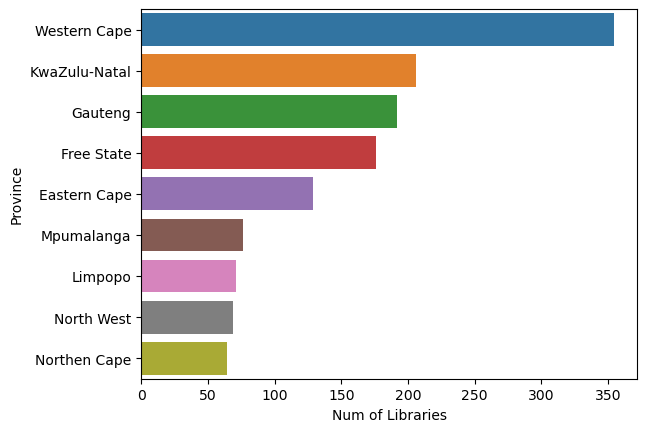

In [10]:
sns.barplot(y = 'province',
            x = 'Num of Libraries',
            data = prov_lib_count)
plt.ylabel('Province')
plt.show()

# Schools Data

In [11]:
#df_schools = pd.read_csv('2021 -open- Ordinary schools.xlsx')
df_schools=pd.read_excel(io='/Users/ADMIN/Downloads/EducationData/2021 -open- Ordinary schools.xlsx')

In [12]:
df_schools.head()

,DataYear,NatEmis,Province,ProvinceCD,Official_Institution_Name,STATUS,Sector,Type_DoE,Phase_PED,Specialisation,...,Registration_Date,NoFeeSchool,Urban_Rural,Allocation,DemarcationFrom,DemarcationTo,OldNATEMIS,NewNATEMIS,Learners2021,Educators2021
0,2021,200200015,EC,2,AMANTINDE SENIOR SECONDARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,SECONDARY SCHOOL,Ordinary,...,1961-01-01 00:00:00,YES,Urban,NaN,NONE,Not Moved,200200015.0,200200015.0,NaN,NaN
1,2021,200300159,EC,2,JIJINGUBO PRIMARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,...,1981-01-01 00:00:00,YES,Rural,NaN,NONE,Not Moved,200300159.0,200300159.0,NaN,NaN
2,2021,200600148,EC,2,DUNSKYE PRIMARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,...,1995-01-01 00:00:00,YES,Rural,NaN,NONE,Not Moved,200600148.0,200600148.0,NaN,NaN
3,2021,200501114,EC,2,SINYAQA SENIOR PRIMARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,...,1958-01-01 00:00:00,YES,Rural,NaN,NONE,Not Moved,200501114.0,200501114.0,NaN,NaN
4,2021,200200052,EC,2,BOMVANA PUBLIC SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,...,1968-01-01 00:00:00,YES,Rural,NaN,NONE,Not Moved,200200052.0,200200052.0,NaN,NaN


In [13]:
df_schools.duplicated().sum()

0

In [14]:
df_schools.shape

(25396, 48)

In [15]:
df_schools.head(3)

,DataYear,NatEmis,Province,ProvinceCD,Official_Institution_Name,STATUS,Sector,Type_DoE,Phase_PED,Specialisation,...,Registration_Date,NoFeeSchool,Urban_Rural,Allocation,DemarcationFrom,DemarcationTo,OldNATEMIS,NewNATEMIS,Learners2021,Educators2021
0,2021,200200015,EC,2,AMANTINDE SENIOR SECONDARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,SECONDARY SCHOOL,Ordinary,...,1961-01-01 00:00:00,YES,Urban,NaN,NONE,Not Moved,200200015.0,200200015.0,NaN,NaN
1,2021,200300159,EC,2,JIJINGUBO PRIMARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,...,1981-01-01 00:00:00,YES,Rural,NaN,NONE,Not Moved,200300159.0,200300159.0,NaN,NaN
2,2021,200600148,EC,2,DUNSKYE PRIMARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,...,1995-01-01 00:00:00,YES,Rural,NaN,NONE,Not Moved,200600148.0,200600148.0,NaN,NaN


## Univariate Analysis

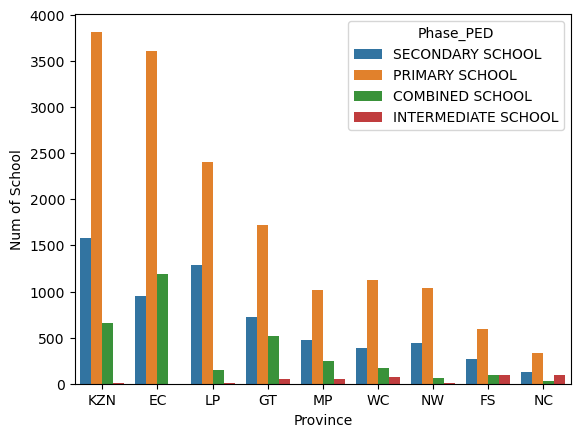

In [16]:
#count of schools by province
sns.countplot(x = 'Province', 
              data = df_schools, 
              hue = 'Phase_PED',
              order = df_schools['Province'].value_counts().index)
plt.ylabel('Num of School')
plt.show()

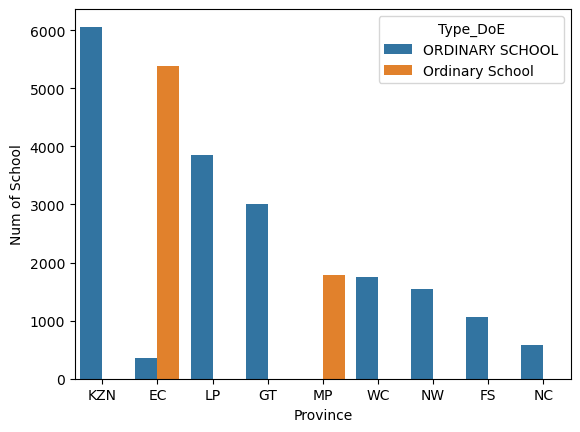

In [17]:
#count of schools by province
sns.countplot(x = 'Province', 
              data = df_schools, 
              hue = 'Type_DoE',
              order = df_schools['Province'].value_counts().index)
plt.ylabel('Num of School')
plt.show()

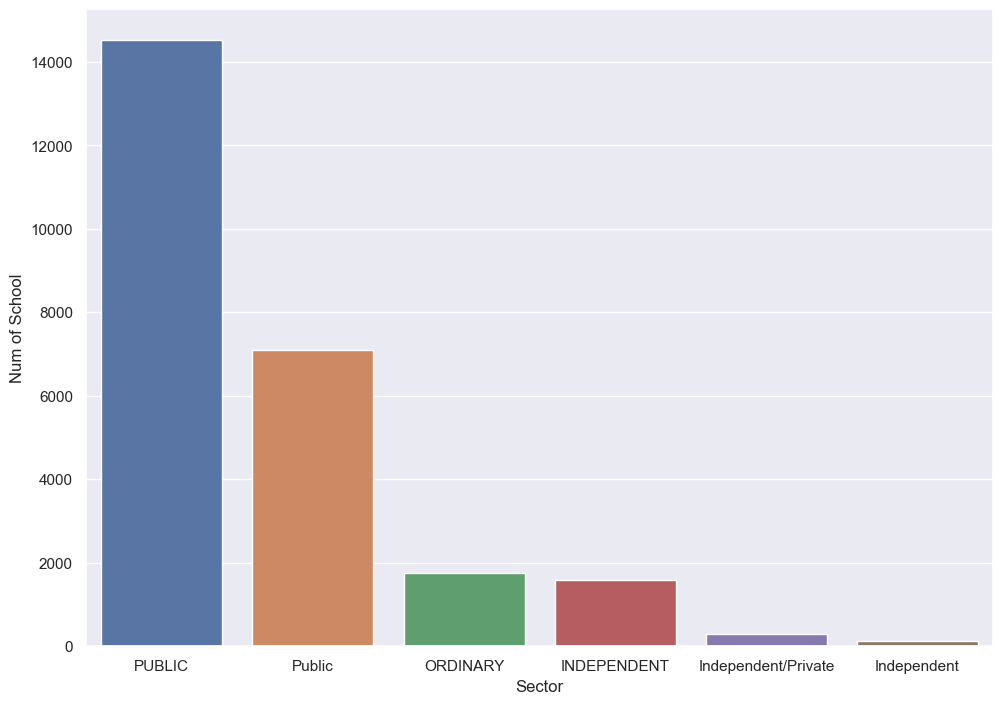

In [18]:
#by sector
#schools by phase
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x = 'Sector', 
              data = df_schools, 
              order = df_schools['Sector'].value_counts().index)
plt.ylabel('Num of School')
plt.show()

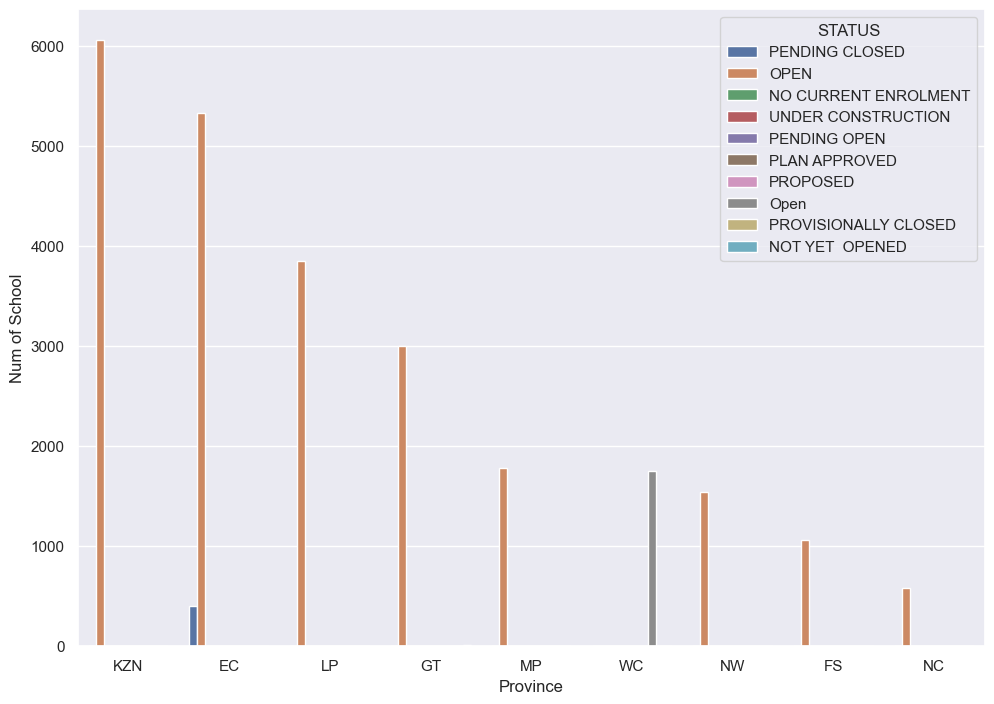

In [19]:
#count of schools by province
sns.countplot(x = 'Province', 
              data = df_schools, 
              hue = 'STATUS',
              order = df_schools['Province'].value_counts().index)
plt.ylabel('Num of School')
plt.show()

### Bivariate Analysis

In [20]:
df_schools.columns

Index(['DataYear', 'NatEmis', 'Province', 'ProvinceCD',
       'Official_Institution_Name', 'STATUS', 'Sector', 'Type_DoE',
       'Phase_PED', 'Specialisation', 'EIDistrict', 'EICircuit', 'OwnerLand',
       'OwnerBuild', 'ExDept', 'Persal_PaypointNo', 'Persal_ComponentNo',
       'ExamNo', 'ExamCentre', 'GIS_Long', 'GIS_Lat', 'DMunName', 'LMunName',
       'Ward_ID', 'SP_Code', 'SP_Name', 'Addressee', 'Township_Village',
       'Suburb', 'Town_City', 'StreetAddress', 'PostalAddress', 'Telephone',
       'Section21', 'Section21_Function', 'Quintile', 'NAS', 'NodalArea',
       'Registration_Date', 'NoFeeSchool', 'Urban_Rural', 'Allocation',
       'DemarcationFrom', 'DemarcationTo', 'OldNATEMIS', 'NewNATEMIS',
       'Learners2021', 'Educators2021'],
      dtype='object')

In [21]:
df_schools = df_schools.drop(['EIDistrict', 'EICircuit', 'OwnerLand',
       'OwnerBuild', 'ExDept', 'Persal_PaypointNo', 'Persal_ComponentNo',
       'ExamNo', 'ExamCentre','DMunName', 'LMunName',
       'Ward_ID', 'SP_Code', 'SP_Name', 'Addressee', 'Township_Village',
       'Suburb', 'Town_City', 'StreetAddress', 'PostalAddress', 'Telephone',
       'Section21', 'Section21_Function', 'Quintile', 'NAS', 'NodalArea',
       'Registration_Date', 'NoFeeSchool', 'Urban_Rural', 'Allocation',
       'DemarcationFrom', 'DemarcationTo','Learners2021', 'Educators2021'],axis=1)

In [22]:
df_schools

,DataYear,NatEmis,Province,ProvinceCD,Official_Institution_Name,STATUS,Sector,Type_DoE,Phase_PED,Specialisation,GIS_Long,GIS_Lat,OldNATEMIS,NewNATEMIS
0,2021,200200015,EC,2,AMANTINDE SENIOR SECONDARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,SECONDARY SCHOOL,Ordinary,27.32712,-32.82452,200200015.0,200200015.0
1,2021,200300159,EC,2,JIJINGUBO PRIMARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,28.6334,-32.20496,200300159.0,200300159.0
2,2021,200600148,EC,2,DUNSKYE PRIMARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,26.95222,-32.51454,200600148.0,200600148.0
3,2021,200501114,EC,2,SINYAQA SENIOR PRIMARY SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,29.02773,-30.7879,200501114.0,200501114.0
4,2021,200200052,EC,2,BOMVANA PUBLIC SCHOOL,PENDING CLOSED,Public,ORDINARY SCHOOL,PRIMARY SCHOOL,Ordinary,27.40382,-32.43557,200200052.0,200200052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25391,2021,300033206,NC,3,HANTAM PRIMÊRE SKOOL,OPEN,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,NaN,NaN,300033206.0,300033206.0
25392,2021,300045219,NC,3,BANKHARE-BODILONG PRIMARY SCHOOL,OPEN,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,NaN,NaN,300045219.0,300045219.0
25393,2021,300016302,NC,3,!XUNKHWESA COMBINED SCHOOL,OPEN,PUBLIC,ORDINARY SCHOOL,COMBINED SCHOOL,ORDINARY SCHOOL,NaN,NaN,300016302.0,300016302.0
25394,2021,300044203,NC,3,DEBEN PRIMÊRE SKOOL,OPEN,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,NaN,NaN,300044203.0,300044203.0


In [23]:
#join columns 'OldNATEMIS', 'NewNATEMIS', 'NatEmis' to one column called school_id
#join columns 'Sector', 'Specialisation' to one column called Speciaization

In [24]:
df_schools['NewNATEMIS'] = df_schools['NewNATEMIS'].combine_first(df_schools['OldNATEMIS'])
df_schools = df_schools.drop('OldNATEMIS', axis=1)

In [25]:
df_schools['NatEmis'] = df_schools['NatEmis'].combine_first(df_schools['NewNATEMIS'])
df_schools = df_schools.drop('NewNATEMIS', axis=1)

In [26]:
df_schools['Specialisation'] = df_schools['Specialisation'].combine_first(df_schools['Type_DoE'])
df_schools = df_schools.drop('Type_DoE', axis=1)

In [27]:
df_schools

,DataYear,NatEmis,Province,ProvinceCD,Official_Institution_Name,STATUS,Sector,Phase_PED,Specialisation,GIS_Long,GIS_Lat
0,2021,200200015,EC,2,AMANTINDE SENIOR SECONDARY SCHOOL,PENDING CLOSED,Public,SECONDARY SCHOOL,Ordinary,27.32712,-32.82452
1,2021,200300159,EC,2,JIJINGUBO PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,28.6334,-32.20496
2,2021,200600148,EC,2,DUNSKYE PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,26.95222,-32.51454
3,2021,200501114,EC,2,SINYAQA SENIOR PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,29.02773,-30.7879
4,2021,200200052,EC,2,BOMVANA PUBLIC SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,27.40382,-32.43557
...,...,...,...,...,...,...,...,...,...,...,...
25391,2021,300033206,NC,3,HANTAM PRIMÊRE SKOOL,OPEN,PUBLIC,PRIMARY SCHOOL,ORDINARY SCHOOL,NaN,NaN
25392,2021,300045219,NC,3,BANKHARE-BODILONG PRIMARY SCHOOL,OPEN,PUBLIC,PRIMARY SCHOOL,ORDINARY SCHOOL,NaN,NaN
25393,2021,300016302,NC,3,!XUNKHWESA COMBINED SCHOOL,OPEN,PUBLIC,COMBINED SCHOOL,ORDINARY SCHOOL,NaN,NaN
25394,2021,300044203,NC,3,DEBEN PRIMÊRE SKOOL,OPEN,PUBLIC,PRIMARY SCHOOL,ORDINARY SCHOOL,NaN,NaN


In [28]:
# Split the DataFrame based on the values in the 'Phase' column
df_primary = df_schools[df_schools['Phase_PED'] == 'PRIMARY SCHOOL']
df_secondary = df_schools[df_schools['Phase_PED'] == 'SECONDARY SCHOOL']
df_combined = df_schools[df_schools['Phase_PED'] == 'COMBINED SCHOOL']

# Print the resulting DataFrames
print("DataFrame 1 (Primary Schools):\n", df_primary)
print("\nDataFrame 2 (Secondary Schools):\n", df_secondary)
print("\nDataFrame 3 (Combined Schools):\n", df_combined)


DataFrame 1 (Primary Schools):
        DataYear    NatEmis Province  ProvinceCD  \
1          2021  200300159       EC           2   
2          2021  200600148       EC           2   
3          2021  200501114       EC           2   
4          2021  200200052       EC           2   
6          2021  200300806       EC           2   
...         ...        ...      ...         ...   
25389      2021  300044205       NC           3   
25391      2021  300033206       NC           3   
25392      2021  300045219       NC           3   
25394      2021  300044203       NC           3   
25395      2021  300044209       NC           3   

               Official_Institution_Name          STATUS               Sector  \
1               JIJINGUBO PRIMARY SCHOOL  PENDING CLOSED               Public   
2                 DUNSKYE PRIMARY SCHOOL  PENDING CLOSED               Public   
3          SINYAQA SENIOR PRIMARY SCHOOL  PENDING CLOSED               Public   
4                  BOMVANA PUBL

In [29]:
bdhbdshvhvdshvds

NameError: name 'bdhbdshvhvdshvds' is not defined

### Handling Missing Values

In [30]:
print(df_primary.isna().sum().sum())
print(df_primary.isna().sum())
print(df_secondary.isna().sum().sum())
print(df_secondary.isna().sum())
print(df_combined.isna().sum().sum())
print(df_combined.isna().sum())

9504
DataYear                        0
NatEmis                         0
Province                        0
ProvinceCD                      0
Official_Institution_Name       0
STATUS                          0
Sector                          0
Phase_PED                       0
Specialisation                  0
GIS_Long                     4752
GIS_Lat                      4752
dtype: int64
3936
DataYear                        0
NatEmis                         0
Province                        0
ProvinceCD                      0
Official_Institution_Name       0
STATUS                          0
Sector                          0
Phase_PED                       0
Specialisation                  0
GIS_Long                     1968
GIS_Lat                      1968
dtype: int64
1570
DataYear                       0
NatEmis                        0
Province                       0
ProvinceCD                     0
Official_Institution_Name      0
STATUS                         0
Sector       

In [31]:
# Remove rows with NaN values
df_primary_without_nan_rows = df_primary.dropna()
df_secondary_without_nan_rows = df_secondary.dropna()
df_combined_without_nan_rows = df_combined.dropna()

<Axes: >

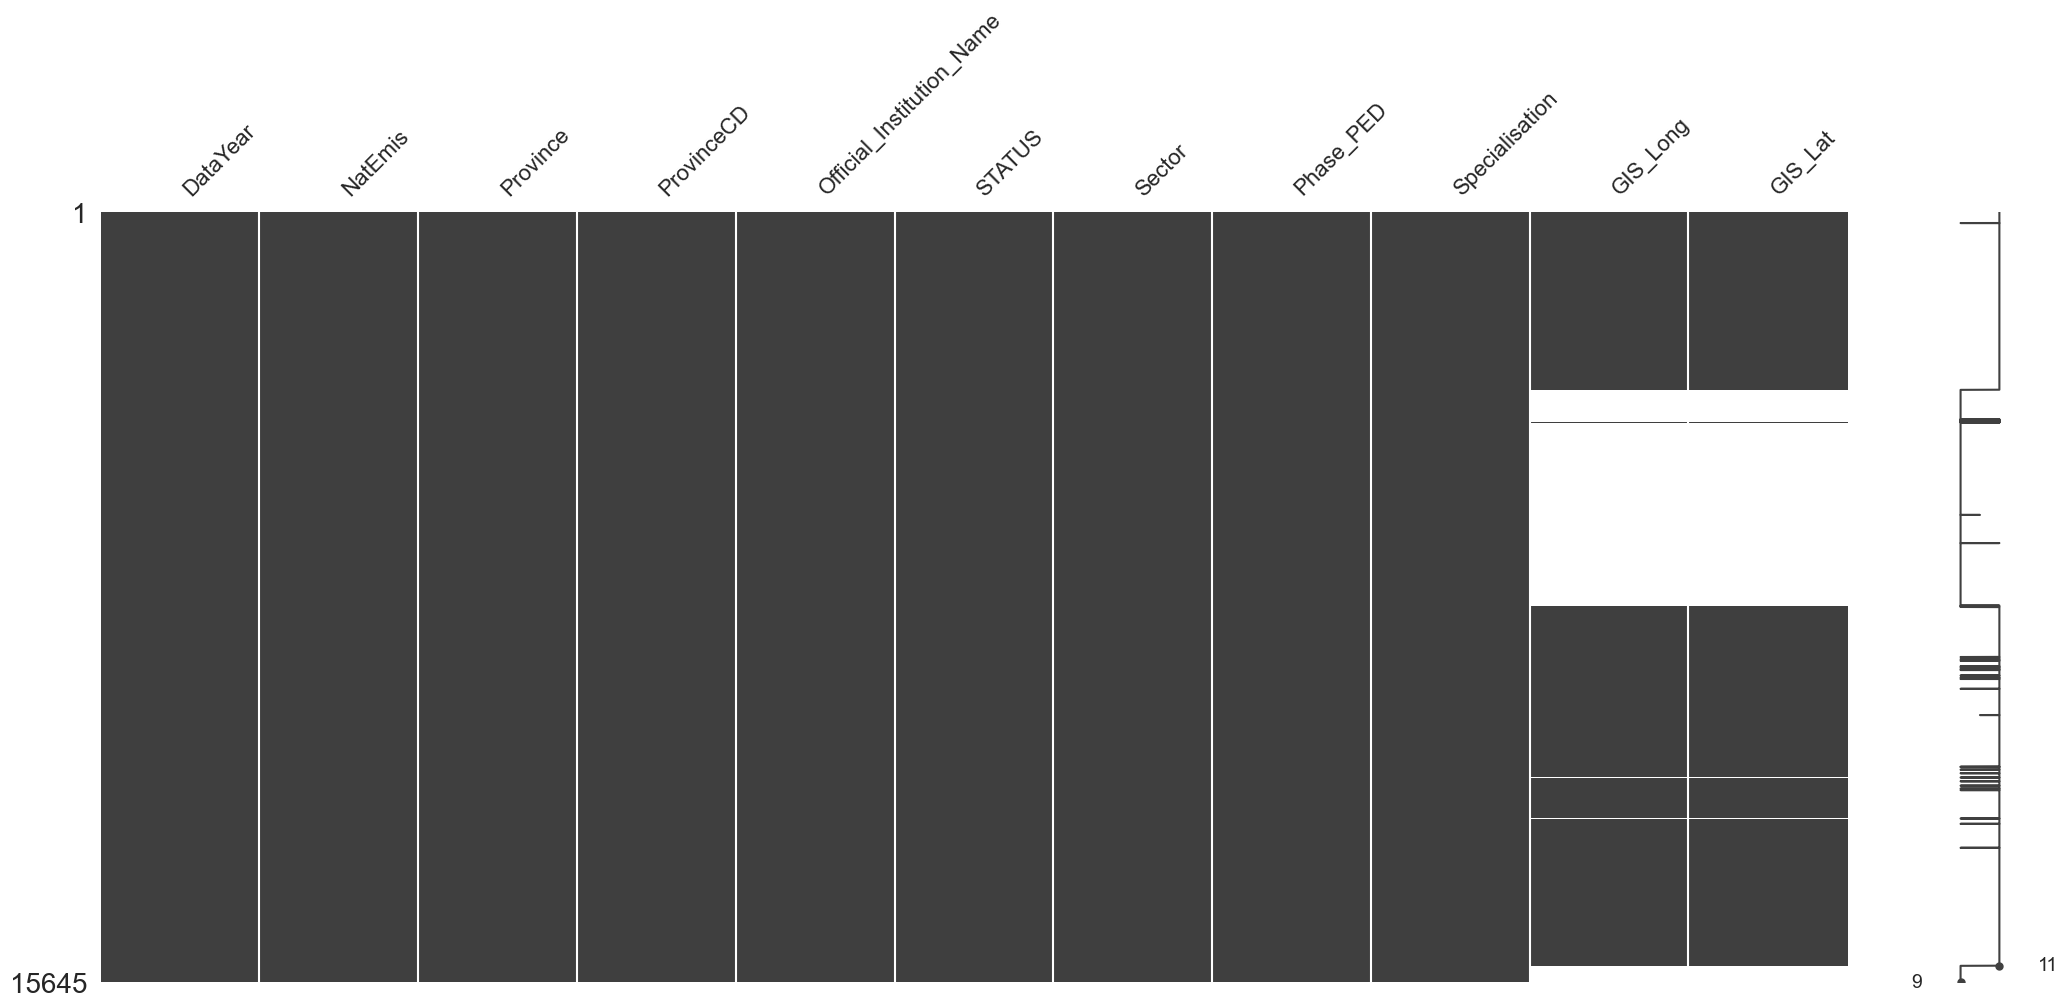

In [32]:
msno.matrix(df_primary)

<Axes: >

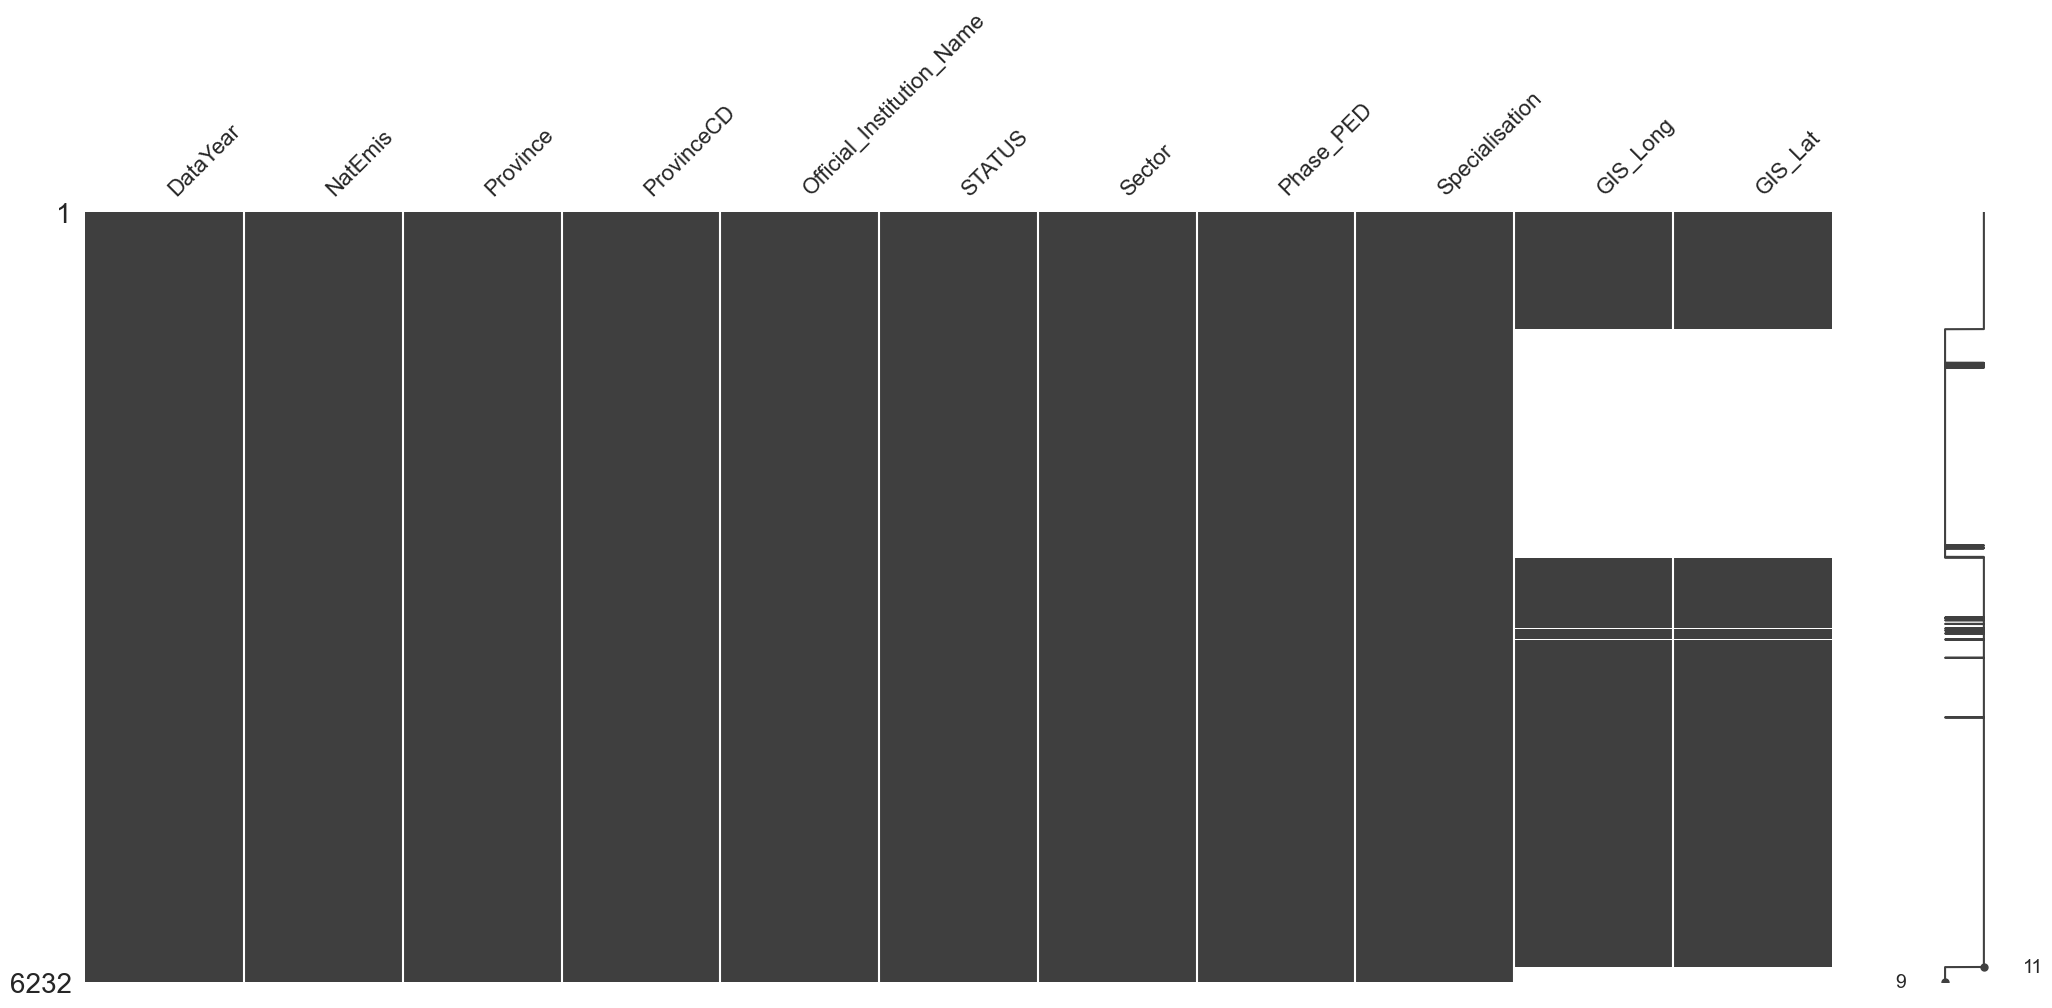

In [33]:
msno.matrix(df_secondary)

<Axes: >

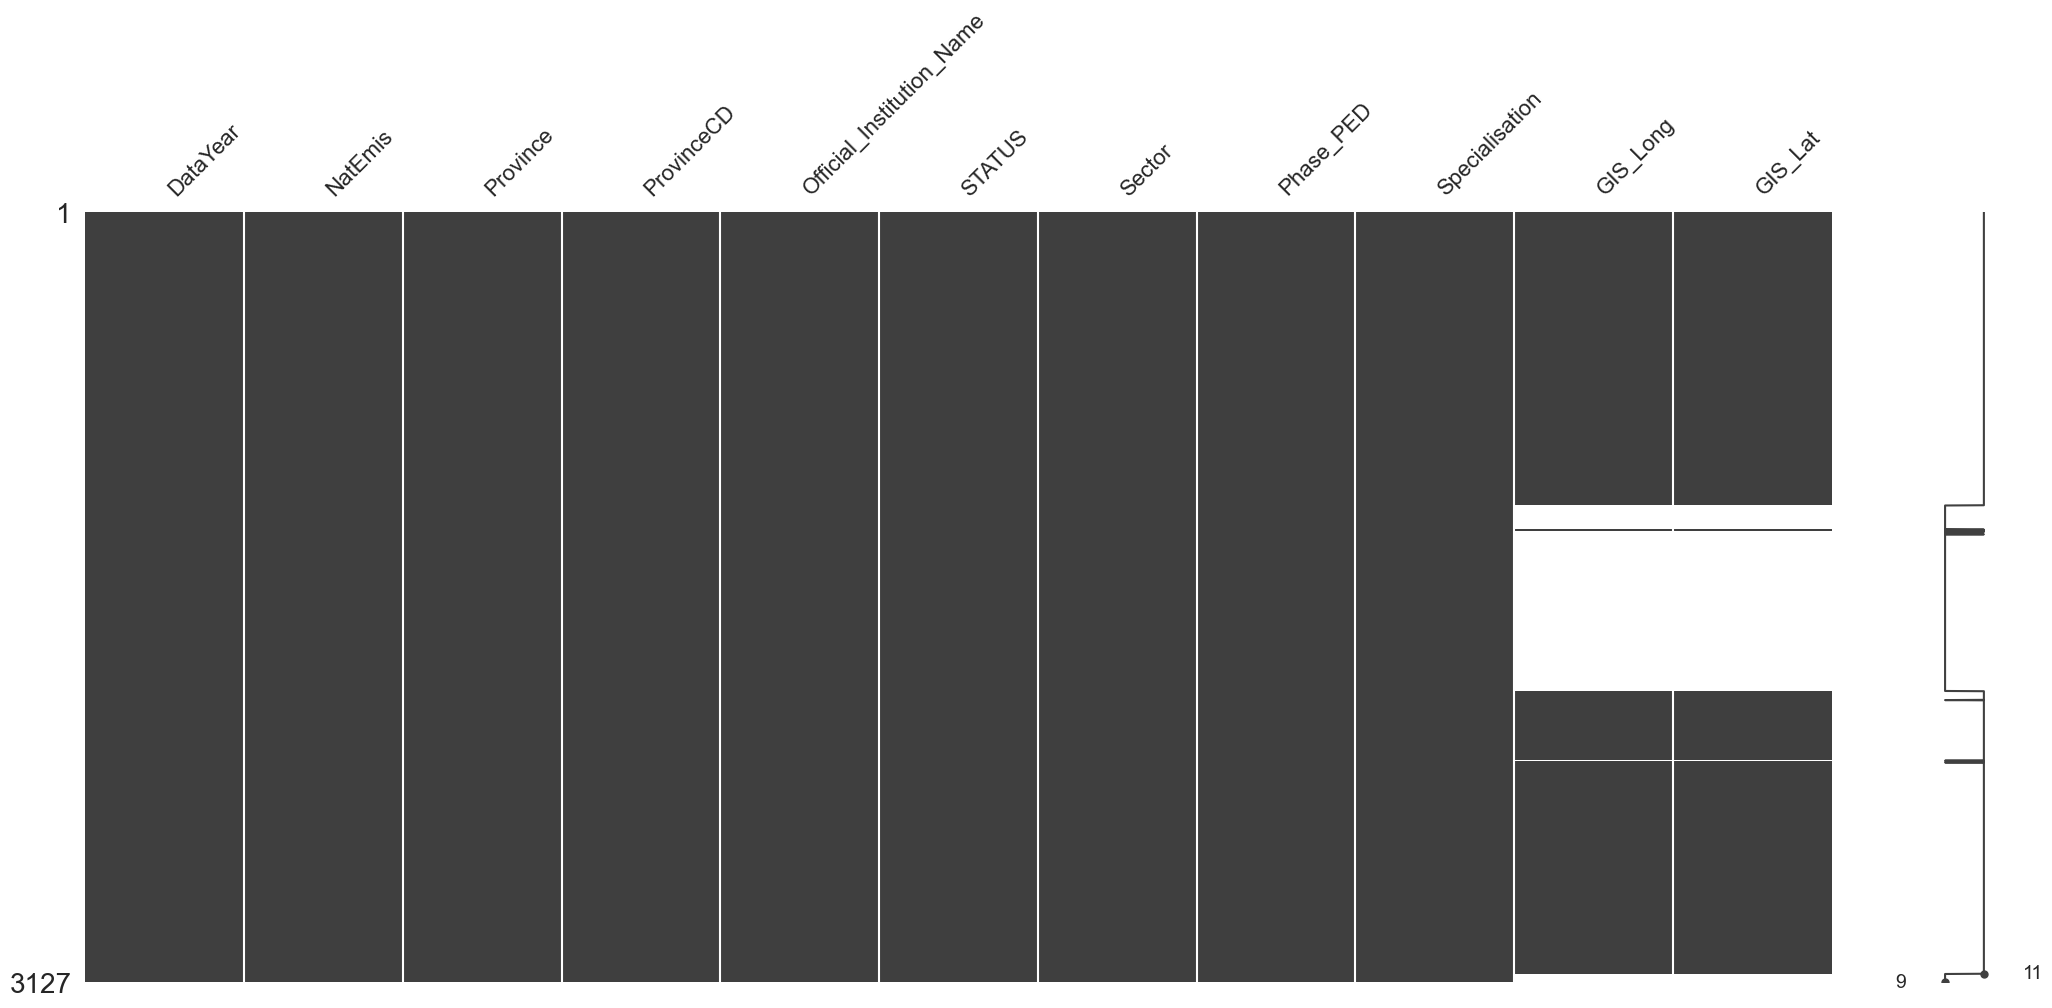

In [34]:
msno.matrix(df_combined)

<Axes: >

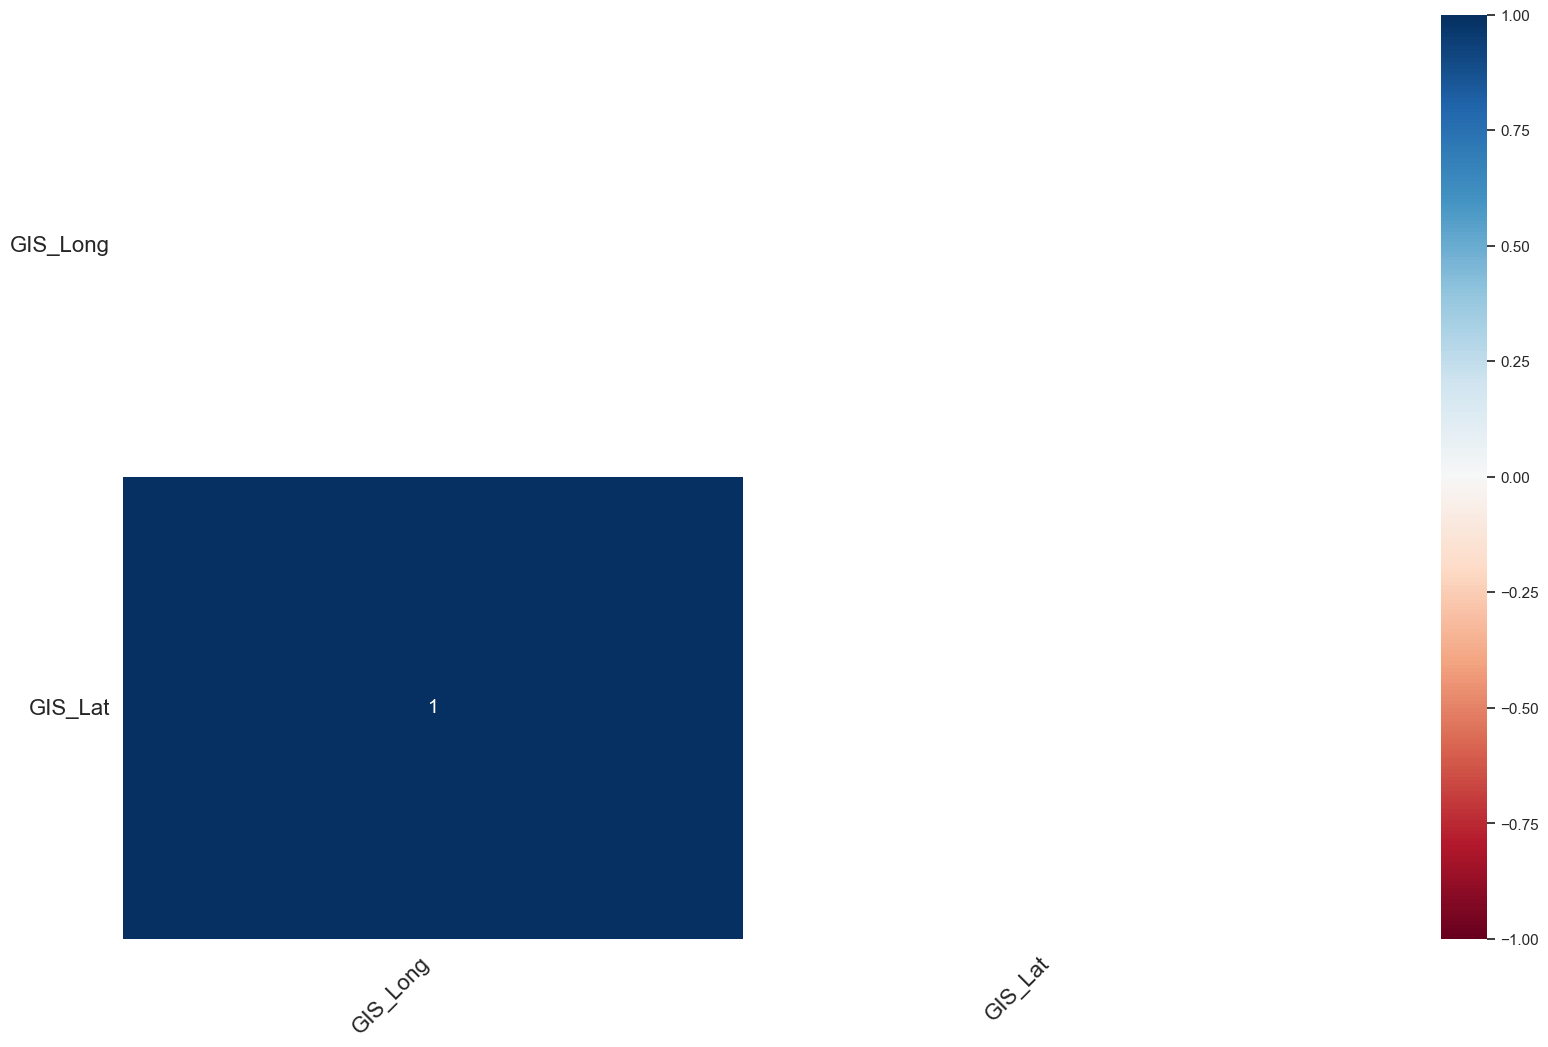

In [35]:
msno.heatmap(df_schools)

In [36]:
#impute ownerland and section 21
imp = SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')

In [37]:
data_imp = imp.fit_transform(df_schools[['GIS_Lat','GIS_Long']])

In [38]:
df_schools['GIS_Lat'] = data_imp[:,0]

In [39]:
df_schools['GIS_Long'] = data_imp[:,1]

In [40]:
df_schools.head()

,DataYear,NatEmis,Province,ProvinceCD,Official_Institution_Name,STATUS,Sector,Phase_PED,Specialisation,GIS_Long,GIS_Lat
0,2021,200200015,EC,2,AMANTINDE SENIOR SECONDARY SCHOOL,PENDING CLOSED,Public,SECONDARY SCHOOL,Ordinary,27.32712,-32.82452
1,2021,200300159,EC,2,JIJINGUBO PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,28.6334,-32.20496
2,2021,200600148,EC,2,DUNSKYE PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,26.95222,-32.51454
3,2021,200501114,EC,2,SINYAQA SENIOR PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,29.02773,-30.7879
4,2021,200200052,EC,2,BOMVANA PUBLIC SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,27.40382,-32.43557


In [41]:
df_schools.isna().sum().sum()

0

### Exploring Subject Performance and Matric results data

In [65]:
#df_perf = pd.read_csv('Performance.csv')
MatricResultsData=pd.read_excel(io='/Users/ADMIN/Downloads/EducationData/matric_school_results_2016-2018.xlsx')
SubjectPerformanceData=pd.read_excel(io='/Users/ADMIN/Downloads/EducationData/subject_performance_matric-2016.xlsx')

In [66]:
df_perf = SubjectPerformanceData 
df_matric = MatricResultsData

In [67]:
df_perf.shape

(6234, 43)

In [68]:
df_matric.shape

(6196, 19)

In [69]:
df_perf.columns

Index(['Unnamed: 0', 'province', 'district', 'centre_name', 'number',
       'quintile', 'accounting_pass', 'agricultural_sciences_pass',
       'business_studies_pass', 'economics_pass', 'english_pass',
       'geography_pass', 'history_pass', 'life_sciences_pass', 'math_lit_pass',
       'mathematics_pass', 'physical_sciences_pass', 'all_subjects_pass',
       'centre_lat', 'centre_long', 'district_latitude_x',
       'district_longitude_x', 'stem_pass', 'EMIS', '2016: No Progressed',
       '2016: Wrote', '2016: Achieved', '2016: % Achieved',
       '2017: No Progressed', '2017: Wrote', '2017: Achieved',
       '2017: % Achieved', '2018: No Progressed', '2018: Wrote',
       '2018: Achieved', '2018: % Achieved', 'School Name', 'Language_1',
       'Language_2', 'Language_3', 'Language_4', 'Language_5', 'Language_5.1'],
      dtype='object')

In [70]:
df_matric.columns

Index(['EMIS', 'Phase', 'Province', 'District Name', 'Centre No',
       'Centre Name', 'Quintile_y', '2016: No Progressed', '2016: Wrote',
       '2016: Achieved', '2016: % Achieved', '2017: No Progressed',
       '2017: Wrote', '2017: Achieved', '2017: % Achieved',
       '2018: No Progressed', '2018: Wrote', '2018: Achieved',
       '2018: % Achieved'],
      dtype='object')

In [71]:
df_perf = df_perf.drop(['accounting_pass', 'agricultural_sciences_pass',
       'business_studies_pass', 'economics_pass', 'english_pass','quintile',
       'geography_pass', 'history_pass', 'life_sciences_pass', 'math_lit_pass',
       'mathematics_pass', 'physical_sciences_pass', 'all_subjects_pass','stem_pass','2016: No Progressed',
       '2016: Wrote', '2016: Achieved', '2016: % Achieved',
       '2017: No Progressed', '2017: Wrote', '2017: Achieved', 
       '2017: % Achieved', '2018: No Progressed', '2018: Wrote',
       '2018: Achieved', '2018: % Achieved', 'School Name', 'Language_1',
       'Language_2', 'Language_3', 'Language_4', 'Language_5', 'Language_5.1'],axis=1)

In [72]:
df_perf

,Unnamed: 0,province,district,centre_name,number,centre_lat,centre_long,district_latitude_x,district_longitude_x,EMIS
0,0,Free State,Motheo,ITOKISETSENG BOKAMOSO SS,3173009,-29.525160,27.146510,-29.357122,26.608165,442607336
1,2,KwaZulu Natal,Ilembe,MAGUDWINI JS,5413314,NaN,NaN,NaN,NaN,500192659
2,3,KwaZulu Natal,Uthukela,MTHANIYA COMBINED,5211236,-28.678345,29.603549,-28.678345,29.603549,500340141
3,5,KwaZulu Natal,King Cetshwayo,DLOZILESIZWE COMBINED SCHOOL,5113144,-28.619176,31.537000,-28.619176,31.537000,500324897
4,7,Eastern Cape,Amathole East,MATHUMBU SENIOR SECONDARY SCHOOL,4301045,-32.584197,27.361648,-32.584197,27.361648,200300295
...,...,...,...,...,...,...,...,...,...,...
6229,9045,North West,Dr. K. Kaunda District,POTCHEFSTROOM GIRLS HIGH,9225099,-26.718031,27.090244,-26.861794,26.513796,600101675
6230,9046,North West,Ngaka M. Molema District,LIVING FAITH COMBINED SCHOOL,9424261,NaN,NaN,NaN,NaN,600104098
6231,9047,North West,Ngaka M. Molema District,GOLF VIEW PARK HIGH SCHOOL,9424277,NaN,NaN,NaN,NaN,600105067
6232,9048,North West,Ngaka M. Molema District,CURRO ACADEMY MAHIKENG,9424280,-25.837376,25.636965,NaN,NaN,600105355


In [73]:
df_matric = df_matric.drop([ 'Quintile_y', '2016: No Progressed', '2016: Wrote',
       '2016: Achieved', '2016: % Achieved', '2017: No Progressed',
       '2017: Wrote', '2017: Achieved', '2017: % Achieved',
       '2018: No Progressed', '2018: Wrote', '2018: Achieved',
       '2018: % Achieved'],axis=1)   

In [74]:
df_matric

,EMIS,Phase,Province,District Name,Centre No,Centre Name
0,996606832,Secondary,LP,Sekhukhune 2,7104410,Ntshiba Secondary School
1,996606828,Secondary,LP,Sekhukhune 2,7104408,Tshikanoshi Secondary School
2,996606824,Secondary,LP,Sekhukhune 2,7104404,Rephafogile Secondary School
3,996606821,Secondary,LP,Sekhukhune 2,7104411,Kgagatlou Secondary School
4,996606820,Secondary,LP,Sekhukhune 2,7104407,Refilwe Secondary School
...,...,...,...,...,...,...
6191,100000108,Unknown,WC,Metro East,1004497,Northpine Technical Hs
6192,100000091,Unknown,WC,West Coast,1005596,Cederberg Academy
6193,100000091,Unknown,WC,West Coast,1005596,Cederberg Academy
6194,100000055,Unknown,WC,Metro Central,1001203,Claremont Hs


In [75]:
print(df_perf.columns)
print(df_matric.columns)

Index(['Unnamed: 0', 'province', 'district', 'centre_name', 'number',
       'centre_lat', 'centre_long', 'district_latitude_x',
       'district_longitude_x', 'EMIS'],
      dtype='object')
Index(['EMIS', 'Phase', 'Province', 'District Name', 'Centre No',
       'Centre Name'],
      dtype='object')


In [76]:
df_perf['Phase'] = 'Secondary School'

In [77]:
df_perf = df_perf.drop('Unnamed: 0', axis=1)

In [78]:
print(df_perf.columns)
print(df_matric.columns)

Index(['province', 'district', 'centre_name', 'number', 'centre_lat',
       'centre_long', 'district_latitude_x', 'district_longitude_x', 'EMIS',
       'Phase'],
      dtype='object')
Index(['EMIS', 'Phase', 'Province', 'District Name', 'Centre No',
       'Centre Name'],
      dtype='object')


In [79]:
df_matric['district_latitude_x'] = np.nan
df_matric['district_longitude_x'] = np.nan
df_matric['centre_lat'] = np.nan
df_matric['centre_long'] = np.nan

In [80]:
print(df_perf.columns)
print(df_matric.columns)

Index(['province', 'district', 'centre_name', 'number', 'centre_lat',
       'centre_long', 'district_latitude_x', 'district_longitude_x', 'EMIS',
       'Phase'],
      dtype='object')
Index(['EMIS', 'Phase', 'Province', 'District Name', 'Centre No',
       'Centre Name', 'district_latitude_x', 'district_longitude_x',
       'centre_lat', 'centre_long'],
      dtype='object')


In [81]:
df_matric = df_matric.rename(columns={'Province': 'province'})
df_matric = df_matric.rename(columns={'District Name': 'district'})
df_matric = df_matric.rename(columns={'Centre Name': 'centre_name'})

In [82]:
print(df_perf.columns)
print(df_matric.columns)

Index(['province', 'district', 'centre_name', 'number', 'centre_lat',
       'centre_long', 'district_latitude_x', 'district_longitude_x', 'EMIS',
       'Phase'],
      dtype='object')
Index(['EMIS', 'Phase', 'province', 'district', 'Centre No', 'centre_name',
       'district_latitude_x', 'district_longitude_x', 'centre_lat',
       'centre_long'],
      dtype='object')


In [83]:
schools2_df = pd.concat([df_perf, df_matric])

In [86]:
schools2_df

,province,district,centre_name,number,centre_lat,centre_long,district_latitude_x,district_longitude_x,EMIS,Phase,Centre No
0,Free State,Motheo,ITOKISETSENG BOKAMOSO SS,3173009.0,-29.525160,27.146510,-29.357122,26.608165,442607336,Secondary School,NaN
1,KwaZulu Natal,Ilembe,MAGUDWINI JS,5413314.0,NaN,NaN,NaN,NaN,500192659,Secondary School,NaN
2,KwaZulu Natal,Uthukela,MTHANIYA COMBINED,5211236.0,-28.678345,29.603549,-28.678345,29.603549,500340141,Secondary School,NaN
3,KwaZulu Natal,King Cetshwayo,DLOZILESIZWE COMBINED SCHOOL,5113144.0,-28.619176,31.537000,-28.619176,31.537000,500324897,Secondary School,NaN
4,Eastern Cape,Amathole East,MATHUMBU SENIOR SECONDARY SCHOOL,4301045.0,-32.584197,27.361648,-32.584197,27.361648,200300295,Secondary School,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6191,WC,Metro East,Northpine Technical Hs,NaN,NaN,NaN,NaN,NaN,100000108,Unknown,1004497.0
6192,WC,West Coast,Cederberg Academy,NaN,NaN,NaN,NaN,NaN,100000091,Unknown,1005596.0
6193,WC,West Coast,Cederberg Academy,NaN,NaN,NaN,NaN,NaN,100000091,Unknown,1005596.0
6194,WC,Metro Central,Claremont Hs,NaN,NaN,NaN,NaN,NaN,100000055,Unknown,1001203.0


In [87]:
# combine the two datasets
# Merge the DataFrames
#school2_df = pd.merge(df_perf, df_matric, on='EMIS')

In [88]:
df_schools

,DataYear,NatEmis,Province,ProvinceCD,Official_Institution_Name,STATUS,Sector,Phase_PED,Specialisation,GIS_Long,GIS_Lat
0,2021,200200015,EC,2,AMANTINDE SENIOR SECONDARY SCHOOL,PENDING CLOSED,Public,SECONDARY SCHOOL,Ordinary,27.32712,-32.82452
1,2021,200300159,EC,2,JIJINGUBO PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,28.6334,-32.20496
2,2021,200600148,EC,2,DUNSKYE PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,26.95222,-32.51454
3,2021,200501114,EC,2,SINYAQA SENIOR PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,29.02773,-30.7879
4,2021,200200052,EC,2,BOMVANA PUBLIC SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,27.40382,-32.43557
...,...,...,...,...,...,...,...,...,...,...,...
25391,2021,300033206,NC,3,HANTAM PRIMÊRE SKOOL,OPEN,PUBLIC,PRIMARY SCHOOL,ORDINARY SCHOOL,0,0
25392,2021,300045219,NC,3,BANKHARE-BODILONG PRIMARY SCHOOL,OPEN,PUBLIC,PRIMARY SCHOOL,ORDINARY SCHOOL,0,0
25393,2021,300016302,NC,3,!XUNKHWESA COMBINED SCHOOL,OPEN,PUBLIC,COMBINED SCHOOL,ORDINARY SCHOOL,0,0
25394,2021,300044203,NC,3,DEBEN PRIMÊRE SKOOL,OPEN,PUBLIC,PRIMARY SCHOOL,ORDINARY SCHOOL,0,0


In [92]:
print(df_schools.columns)
print(schools2_df.columns)

Index(['DataYear', 'NatEmis', 'Province', 'ProvinceCD',
       'Official_Institution_Name', 'STATUS', 'Sector', 'Phase_PED',
       'Specialisation', 'GIS_Long', 'GIS_Lat'],
      dtype='object')
Index(['province', 'district', 'centre_name', 'number', 'centre_lat',
       'centre_long', 'district_latitude_x', 'district_longitude_x', 'EMIS',
       'Phase', 'Centre No'],
      dtype='object')


In [93]:
df_schools = df_schools.rename(columns={'NatEmis': 'EMIS'})
df_schools = df_schools.rename(columns={'Province': 'province'})
df_schools = df_schools.rename(columns={'Official_Institution_Name': 'name'})

In [94]:
print(df_schools.columns)
print(schools2_df.columns)

Index(['DataYear', 'EMIS', 'province', 'ProvinceCD', 'name', 'STATUS',
       'Sector', 'Phase_PED', 'Specialisation', 'GIS_Long', 'GIS_Lat'],
      dtype='object')
Index(['province', 'district', 'centre_name', 'number', 'centre_lat',
       'centre_long', 'district_latitude_x', 'district_longitude_x', 'EMIS',
       'Phase', 'Centre No'],
      dtype='object')


In [96]:
schools2_df['DataYear'] = '2017'

In [98]:
schools2_df = schools2_df.rename(columns={'Phase': 'Phase_PED'})
schools2_df = schools2_df.rename(columns={'centre_lat': 'GIS_Lat'})
schools2_df = schools2_df.rename(columns={'centre_long': 'GIS_Long'})

In [99]:
print(df_schools.columns)
print(schools2_df.columns)

Index(['DataYear', 'EMIS', 'province', 'ProvinceCD', 'name', 'STATUS',
       'Sector', 'Phase_PED', 'Specialisation', 'GIS_Long', 'GIS_Lat'],
      dtype='object')
Index(['province', 'district', 'centre_name', 'number', 'GIS_Lat', 'GIS_Long',
       'district_latitude_x', 'district_longitude_x', 'EMIS', 'Phase_PED',
       'Centre No', 'DataYear'],
      dtype='object')


In [100]:
schools2_df = schools2_df.rename(columns={'centre_name': 'name'})
schools2_df = schools2_df.drop([ 'district_latitude_x', 'district_longitude_x', 'Centre No'],axis=1)   

In [102]:
print(df_schools.columns)
print(schools2_df.columns)

Index(['DataYear', 'EMIS', 'province', 'ProvinceCD', 'name', 'STATUS',
       'Sector', 'Phase_PED', 'Specialisation', 'GIS_Long', 'GIS_Lat'],
      dtype='object')
Index(['province', 'district', 'name', 'number', 'GIS_Lat', 'GIS_Long', 'EMIS',
       'Phase_PED', 'DataYear'],
      dtype='object')


In [103]:
schools2_df = schools2_df.drop([ 'district'],axis=1)    

KeyError: "['district'] not found in axis"

In [106]:
df_schools = df_schools.drop([ 'ProvinceCD'],axis=1)

In [107]:
print(df_schools.columns)
print(schools2_df.columns)

Index(['DataYear', 'EMIS', 'province', 'name', 'STATUS', 'Sector', 'Phase_PED',
       'Specialisation', 'GIS_Long', 'GIS_Lat'],
      dtype='object')
Index(['province', 'name', 'number', 'GIS_Lat', 'GIS_Long', 'EMIS',
       'Phase_PED', 'DataYear'],
      dtype='object')


In [108]:
schools2_df['Specialisation'] = np.nan
schools2_df['Sector'] = np.nan

In [109]:
print(df_schools.columns)
print(schools2_df.columns)

Index(['DataYear', 'EMIS', 'province', 'name', 'STATUS', 'Sector', 'Phase_PED',
       'Specialisation', 'GIS_Long', 'GIS_Lat'],
      dtype='object')
Index(['province', 'name', 'number', 'GIS_Lat', 'GIS_Long', 'EMIS',
       'Phase_PED', 'DataYear', 'Specialisation', 'Sector'],
      dtype='object')


In [110]:
schools2_df = schools2_df.drop([ 'number'],axis=1) 
schools2_df['STATUS'] = np.nan

In [111]:
finalschools_df = pd.concat([df_schools, schools2_df])

In [112]:
#finalschools_df['province_x'] = finalschools_df['province_x'].fillna(finalschools_df['province_y'])

In [113]:
finalschools_df.columns

Index(['DataYear', 'EMIS', 'province', 'name', 'STATUS', 'Sector', 'Phase_PED',
       'Specialisation', 'GIS_Long', 'GIS_Lat'],
      dtype='object')

In [114]:
if finalschools_df['province'].isna().any():
    print("There are NaN values in the column.")
else:
    print("There are no NaN values in the column.")

There are no NaN values in the column.


In [115]:
finalschools_df

,DataYear,EMIS,province,name,STATUS,Sector,Phase_PED,Specialisation,GIS_Long,GIS_Lat
0,2021,200200015,EC,AMANTINDE SENIOR SECONDARY SCHOOL,PENDING CLOSED,Public,SECONDARY SCHOOL,Ordinary,27.32712,-32.82452
1,2021,200300159,EC,JIJINGUBO PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,28.6334,-32.20496
2,2021,200600148,EC,DUNSKYE PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,26.95222,-32.51454
3,2021,200501114,EC,SINYAQA SENIOR PRIMARY SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,29.02773,-30.7879
4,2021,200200052,EC,BOMVANA PUBLIC SCHOOL,PENDING CLOSED,Public,PRIMARY SCHOOL,Ordinary,27.40382,-32.43557
...,...,...,...,...,...,...,...,...,...,...
6191,2017,100000108,WC,Northpine Technical Hs,NaN,NaN,Unknown,NaN,NaN,NaN
6192,2017,100000091,WC,Cederberg Academy,NaN,NaN,Unknown,NaN,NaN,NaN
6193,2017,100000091,WC,Cederberg Academy,NaN,NaN,Unknown,NaN,NaN,NaN
6194,2017,100000055,WC,Claremont Hs,NaN,NaN,Unknown,NaN,NaN,NaN


In [116]:
finalschools_df.to_csv('final_schools_data2.csv')